# Fallzahlen in Deutschland breinigen

In [3]:
import pandas as pd

### Einlesen der HTML Seite mit den Fallzahlen aus Deutschland von der Webseite.
Die Seite wurde vorab mittels einfachen wget heruntergeladen. Direkter Zugriff wird von RKI blockiert.

Die Zahlen sind, wie in Deutschland üblich mit einem `.` als Trenner für die Tausender und `,` als Komma für Dezimalzahlen dargestellt. Damit Pandas die Zahlen nicht falsch interpretiert, setzen wir die jeweiligen Konfigurationen beim Einlesen der Seite.

In [4]:
df = pd.read_html('../original_data/Fallzahlen.html', decimal=',', thousands='.')

In [5]:
len(df)

1

Pandas liefert in diesem Fall nicht nur ein einzelnes Dataset zurück, sondern eine Liste mit allen gefundenen und geparsten Tabellen als Pandas Dataframe. Auf der Seite des RKI gibt es derzeit nur eine Tabelle. Somit nehmen wir einfach die Erste aus dem Array der gefunden Daten.

In [6]:
df_de = df[0]
df_de.head()

Bundes­land Elektro­nisch über­mittelte Fälle  \
   Unnamed: 0_level_1                           An­zahl   
0  Baden-Württem­berg                             25881   
1              Bayern                             35142   
2              Berlin                              4848   
3         Brandenburg                              2058   
4              Bremen                               507   

                                                            
  Dif­fe­renz zum Vor­tag Fälle/ 100.000 Einw. Todes­fälle  
0                   443.0                  234         802  
1                   848.0                  269        1049  
2                   126.0                  129          74  
3                   108.0                   82          54  
4                     7.0                   74          21

Da die Tabelle schwierig zu verarbeitende Spaltenüberschriften hat, bennen wir diese um, damit eine spätere Bereinigung einfacher ist. Die Spaltenanzahl ist bekannt, daher erledigen wir das relativ pragmatisch. 

In [7]:
df_de.columns = ['Bundesland', 'Anzahl', 'diff', 'Pro_Tsd', 'Gestorben']

In [8]:
df_de.tail()

,Bundesland,Anzahl,diff,Pro_Tsd,Gestorben
12,Sachsen,3955,136.000,97,94
13,Sachsen-Anhalt,1248,25.000,57,26
14,Schles­wig-Holstein,2294,49.000,79,55
15,Thüringen,1601,51.000,75,45
16,Gesamt,130450,2.866,157,3569


Die Reihe mit den Gesamtsummen benötigen wir nicht und entfernen sie. Weiterhin verwerfe ich die Spalte mit den Änderungen zum Vortag. Anschließend sortieren wir das Dataframe aufsteigend nach Anzahl.

In [9]:
df_de.drop(columns=['diff'], index=[16], inplace=True)
#df_de.sort_values(by=['Anzahl'], ascending=True, inplace=True)

In [10]:
df_de.to_csv('../data/cases_germany_states.csv')

Abschließend plotten wir eine Vorschau als horizontalen Barchart mit den registriereten Infektionen nach Bundesland.

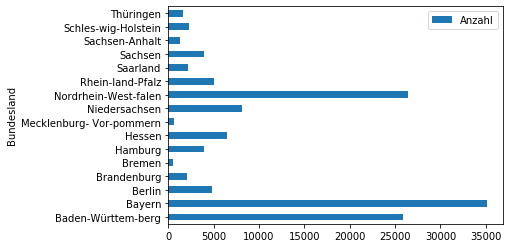

In [11]:
df_de.plot.barh(x='Bundesland', y='Anzahl')